<a href="https://colab.research.google.com/github/MateoRivera/network-dynamics/blob/main/H1/Punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Point a

In [7]:
#Import liberries
import numpy as np
import networkx as nx

In [8]:
#Create the graph
G = nx.DiGraph()
G.add_edge('o', 'a', capacity=3)  # e1
G.add_edge('o', 'b', capacity=3)  # e3
G.add_edge('a', 'd', capacity=2)  # e2
G.add_edge('b', 'd', capacity=2)  # e4
G.add_edge('b', 'c', capacity=3)  # e5
G.add_edge('c', 'd', capacity=1)  # e6
G.add_edge('a', 'b', capacity=1)  # e7


In [10]:
#Define graph as directed one
pos = nx.spring_layout(G)

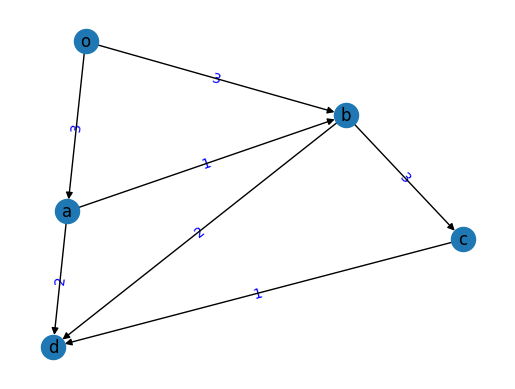

In [19]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={("o","a"):'3',("o","b"):'3',("a","d"):'2',("b","d"):'2',("b","c"):'3',("c","d"):'1',("a","b"):'1'},font_color='blue')
nx.draw(G, pos, with_labels=True) #We have two rows so it is an undirected graph

## Point b

## Point c